# Data Visualization on Coronavirus data
The purpose of this project is to learn more on webscraping, data cleaning, data modeling, data analysis and data Visualization using `Matplotlib`. 

I have written an easy to understand make down for anyone who wants to follow the project. 

I started by getting the data on [worldmeters.info](https://www.worldometers.info/coronavirus/) and cleaning up the data using pandas

After clean up, I modeled the data into regions for easy analysis

# Getting started and import necessary libraries

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re

url = "https://www.worldometers.info/coronavirus/"

source = requests.get(url).text
soup = BeautifulSoup(source, 'lxml')

## Get the whole data table

In [3]:
# this get the whole data table

table = soup.find("table", attrs={'id':'main_table_countries_today'})
# print(table)


In [4]:
# from the table, this extracts the column headings

table_head = table.thead.find_all('tr')
# print(table_head)

In [5]:
# this get the data from the table, the body

table_data = table.tbody.find_all('tr')
# print(table_data)

## Saving the column header into python variable

In [6]:
headings = []

for th in table_head[0].find_all("th"):
    a = th.text.replace('\n', ' ').strip()
    headings.append(a)

    print(a)


Country,Other
TotalCases
NewCases
TotalDeaths
NewDeaths
TotalRecovered
ActiveCases
Serious,Critical
Tot Cases/1M pop
Deaths/1M pop
TotalTests
Tests/ 1M pop
Continent


## Understanding The Data
This is just to understand and see how the data was scraped and how to save the data into pandas dataframe, it's `very important`


In [7]:
# for tr in table_data:
#     for what in tr.find_all('td'):
#         print(what.text)
#     print("\n___________________")

In [8]:
# now that we understand the data, we can structure the data

data = []
for tr in table_data:
    t_row = {}
    # Each table row is stored in the form of
    # t_row = {'Country/Other': '', 'TotalCases': '', 'NewCases': ''...} 

    # find all td's in tr and zip it with headings

    for td, th in zip(tr.find_all("td"), headings): 
        t_row[th] = td.text.replace('\n', '').strip()
    data.append(t_row)


## Check
Checking if data is structured as it should, `this is also very important`

In [9]:
# for t in data:
#     for k, v in t.items():
#         print(v)
#     print("_________\n")

## Transform data
Transform data into pandas dataframe and start data clean up and manipulation

In [10]:
df = pd.DataFrame(data)

# modify data to ease data manipulation (you need to first view data) 
df.columns = df.columns.str.replace('Serious,', '').str.replace(',Other','').str.replace(' ','')
df.set_index('Country', inplace=True)
df.rename(index={"":"Others"}, inplace=True)

# view data again to check if changes were made correctly 
df.head(10)

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Critical,Tot Cases/1Mpop,Deaths/1Mpop,TotalTests,Tests/1Mpop,Continent
Country,,,,,,,,,,,,
North America,"1,440,898","+31,580","87,002","+2,041","275,819","1,078,077","18,097",,,,,North America
Europe,"1,581,256","+27,556","150,513","+2,052","628,107","802,636","15,176",,,,,Europe
South America,"283,091","+15,499","14,482",+899,"95,274","173,335","10,012",,,,,South America
Asia,"634,817","+16,313","21,501",+296,"349,156","264,160","5,115",,,,,Asia
Africa,"58,528","+3,208","2,150",+67,"19,712","36,666",221,,,,,Africa
Oceania,"8,508",+19,118,,"7,522",868,25,,,,,Australia/Oceania
Others,721,,15,,645,61,4,,,,,
World,"4,007,819","+94,175","275,781","+5,355","1,376,235","2,355,803","48,650",514,35.4,,,All
USA,"1,320,044","+27,421","78,529","+1,601","222,008","1,019,507","16,928","3,988",237,"8,601,787","25,987",North America


In [11]:
# more views to understand data better
df.tail(10)

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Critical,Tot Cases/1Mpop,Deaths/1Mpop,TotalTests,Tests/1Mpop,Continent
Country,,,,,,,,,,,,
Mauritania,8,,1,,6,1,,2,0.2,"1,842",396,Africa
Papua New Guinea,8,,,,8,0,,0.9,,"2,402",268,Australia/Oceania
British Virgin Islands,7,,1,,3,3,,232,33,132,"4,366",North America
Bhutan,7,,,,5,2,,9,,"11,492","14,894",Asia
Caribbean Netherlands,6,,,,,6,,229,,110,"4,195",North America
St. Barth,6,,,,6,0,,607,,,,North America
Western Sahara,6,,,,5,1,,10,,,,Africa
Anguilla,3,,,,3,0,,200,,,,North America
Saint Pierre Miquelon,1,,,,,1,,173,,,,North America


In [12]:
# getting data (empty and Datatype) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, North America to China
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TotalCases       222 non-null    object
 1   NewCases         222 non-null    object
 2   TotalDeaths      222 non-null    object
 3   NewDeaths        222 non-null    object
 4   TotalRecovered   222 non-null    object
 5   ActiveCases      222 non-null    object
 6   Critical         222 non-null    object
 7   Tot Cases/1Mpop  222 non-null    object
 8   Deaths/1Mpop     222 non-null    object
 9   TotalTests       222 non-null    object
 10  Tests/1Mpop      222 non-null    object
 11  Continent        222 non-null    object
dtypes: object(12)
memory usage: 11.3+ KB


# Cleaning data
Clearly, the data looks useless as all column datatypes are `string`. To convert data type, data must first be cleaned and ready for conversion.
* I drop the columns that are not considered in this visualization
* I cleaned the data using `regexp` by finding patterns in the data

In [13]:
# # Removed character symbols
for column in df.columns:
    df[column] = df[column].str.replace(r"[^\.a-zA-Z0-9_]", '')

use_column = ['TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'ActiveCases', 'Critical', 'TotalTests', 'Continent']
df = df[use_column]
    
# print out data to see if it works
# df

# Modifying Data and Datatype conversion
To convert the datatype, I can either:
* convert all missing values `(na)` to zero and convert columns to int datatype, or
* Leave the missing values and convert columns to a float datatype `(best practice)`, or
* convert all missing values to zero and convert columns to float

`Important Note`: Missing values must be uniform to perfectly clean the data. The Data has to be understood well enough. In this the missing data is `"NA"` and `None or empty strings`


In [14]:
# a["Continent"] = a.replace("" ,"Others") 
df = df.replace("NA", np.nan)
df = df.replace("", np.nan)
df.fillna(value={"Continent":"Others"}, inplace=True)
df.fillna(0, inplace=True)
df.head(10)

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Critical,TotalTests,Continent
Country,,,,,,,,,
North America,1440898,31580,87002,2041,275819,1078077,18097,0,NorthAmerica
Europe,1581256,27556,150513,2052,628107,802636,15176,0,Europe
South America,283091,15499,14482,899,95274,173335,10012,0,SouthAmerica
Asia,634817,16313,21501,296,349156,264160,5115,0,Asia
Africa,58528,3208,2150,67,19712,36666,221,0,Africa
Oceania,8508,19,118,0,7522,868,25,0,AustraliaOceania
Others,721,0,15,0,645,61,4,0,Others
World,4007819,94175,275781,5355,1376235,2355803,48650,0,All
USA,1320044,27421,78529,1601,222008,1019507,16928,8601787,NorthAmerica


In [15]:

df.tail(10)

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Critical,TotalTests,Continent
Country,,,,,,,,,
Mauritania,8,0,1,0,6,1,0,1842,Africa
Papua New Guinea,8,0,0,0,8,0,0,2402,AustraliaOceania
British Virgin Islands,7,0,1,0,3,3,0,132,NorthAmerica
Bhutan,7,0,0,0,5,2,0,11492,Asia
Caribbean Netherlands,6,0,0,0,0,6,0,110,NorthAmerica
St. Barth,6,0,0,0,6,0,0,0,NorthAmerica
Western Sahara,6,0,0,0,5,1,0,0,Africa
Anguilla,3,0,0,0,3,0,0,0,NorthAmerica
Saint Pierre Miquelon,1,0,0,0,0,1,0,0,NorthAmerica


## Convert columns datatype
* Depending on the the datatype needed, you can convert to `int` or `float` and data will work fine
* I converted the datatype to `float ` here as it is easy to use 
* It is important to catch error here because not all columns can't be converted

In [16]:
for column in df.columns:
    try:
        df[column] = df[column].astype("float")
    except Exception as e:
        print("Column datatype cannot be converted\n") 
    # a[column] =  df[column].map(lambda x: re.sub(r'[^\.a-zA-Z0-9_]', '', x))

Column datatype cannot be converted



In [17]:
# Check if it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, North America to China
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TotalCases      222 non-null    float64
 1   NewCases        222 non-null    float64
 2   TotalDeaths     222 non-null    float64
 3   NewDeaths       222 non-null    float64
 4   TotalRecovered  222 non-null    float64
 5   ActiveCases     222 non-null    float64
 6   Critical        222 non-null    float64
 7   TotalTests      222 non-null    float64
 8   Continent       222 non-null    object 
dtypes: float64(8), object(1)
memory usage: 15.6+ KB


## Save Cleaned data

In [18]:
# df.to_csv("coronadata.csv")

## Preparing Data for analyse

In [19]:
# In here, the is cleaned but not suitable for analyse
# The continent is list in the country column
df.reset_index(inplace=True)

stop = ""
con = []


for stop in df["Country"]:

    if stop == "USA":
       break       
    con.append(stop)

col = []


for stop in df.columns:
    
    col.append(stop)
    if stop == "Critical":
       break

all_country = df[ df["Country"].isin(con) == False]

# I modelled the data into diff table using the continents
* This is just to have data for each continents

In [20]:
continent = df[ df["Country"].isin(con[:-1]) ]
continent = continent[col]

north_america = all_country[ all_country["Continent"] == "NorthAmerica"]

europe = all_country[ all_country["Continent"] == "Europe"]

asia = all_country[ all_country["Continent"] == "Asia"]

south_america = all_country[ all_country["Continent"] == "SouthAmerica"]

oceania = all_country[ all_country["Continent"] == "AustraliaOceania"]

africa = all_country[ all_country["Continent"] == "Africa"]

others = all_country[ all_country["Continent"] == "Others"]


# We now our data ready for analysis
* We have now cleaned the data and it is now perfect for analysis
* Import neccessary library to get the analysis and visualization done

In [21]:
%matplotlib inline
from math import pi

import matplotlib.pyplot as plt
from math import fsum


fontsize = 12
blue    = '#008fd5'
red     = '#fc4f30'
yellow  = '#e5ae37'
green   = '#6d904f'
skye    = '#33D1FF'
dred    = 'r'
pink    = "#FF338A"
lgreen  = '#99FF33'

colors = [blue, green, red, yellow, skye, dred, lgreen, pink]

width = 600
heigth = 400

# PIE chart showing COVID-19 overview
* To do this, I picked the table I need from the `all_country` dataframe
* I summed up the three needed columns and pasesd it into a list, `col_sum`

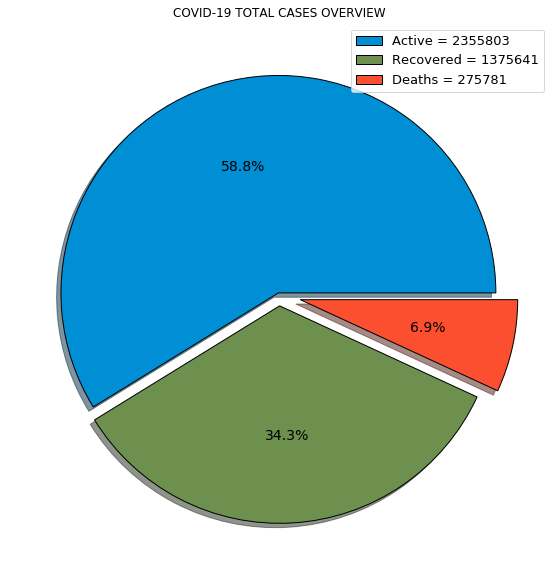

In [22]:
# set plot size
plt.rcParams['figure.figsize'] = [10, 10]

pies = all_country[['ActiveCases','TotalRecovered', 'TotalDeaths']]

col_sum = []
for col in pies.sum(axis = 0, skipna=True):
    col_sum.append(col)


# Plot data
labels = [ 'Active = {:.0f}'.format(col_sum[0]), 
           'Recovered = {:.0f}'.format(col_sum[1]), 
           'Deaths = {:.0f}'.format(col_sum[2])]

explode = [0.01, 0.05, 0.1]

# Plot
plt.pie(col_sum, colors=colors, explode=explode, shadow=True, autopct='%1.1f%%', 
        wedgeprops={'edgecolor':'black'}, textprops={'fontsize': 14})

plt.legend(labels, loc="best", prop={'size': 13})
plt.title(f"COVID-19 TOTAL CASES OVERVIEW")
plt.show()

# DATA VISUALISATION FOR THE TOTAL, DEATH and RECOVERED CASES

* Here, I was preparing data for the cases to be considered
* I only used the top 20 of the data
* I printed it out to be sure
                    

# Total Case

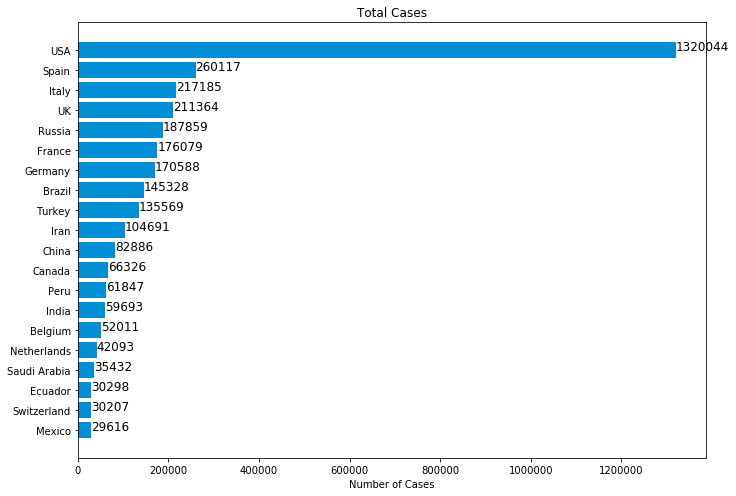

In [23]:
# set plot size
plt.rcParams['figure.figsize'] = [10, 7]

# sort data by total cases in descending order
con_tc = all_country.sort_values(by='TotalCases')

# picking the last 20 countries
con_tc = con_tc.tail(20)

# plot axis
x_tc = con_tc['Country']
y_tc = con_tc['TotalCases']

# plot type
plt.barh(x_tc,y_tc,  color=colors[0])

# plot labels
plt.title("Total Cases")
plt.xlabel("Number of Cases")

plt.tight_layout()

for index, value in enumerate(y_tc):
    s = '{:.0f}'.format(value)
    plt.text(value, index, str(s), fontsize=fontsize)


plt.show()

# Total Death

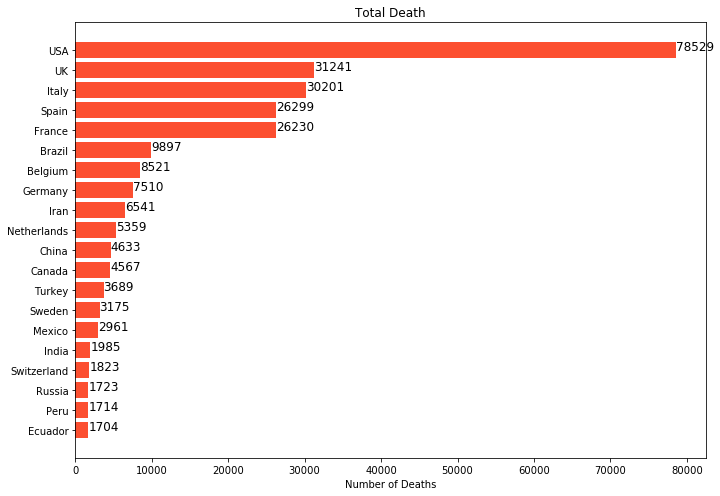

In [24]:
# set plot size
plt.rcParams['figure.figsize'] = [10, 7]

# sorting the data by total death in ascending order
con_td = all_country.sort_values(by='TotalDeaths')

# picking the last 20 countries
con_td = con_td.tail(20)

# plot axis
x_td = con_td['Country']
y_td = con_td['TotalDeaths']

# plot type
plt.barh(x_td,y_td, color=colors[2] )

# plot label
plt.title("Total Death")
plt.xlabel("Number of Deaths")

plt.tight_layout()

for index, value in enumerate(y_td):
    s = '{:.0f}'.format(value)
    plt.text(value, index, str(s), fontsize=fontsize)

plt.show()

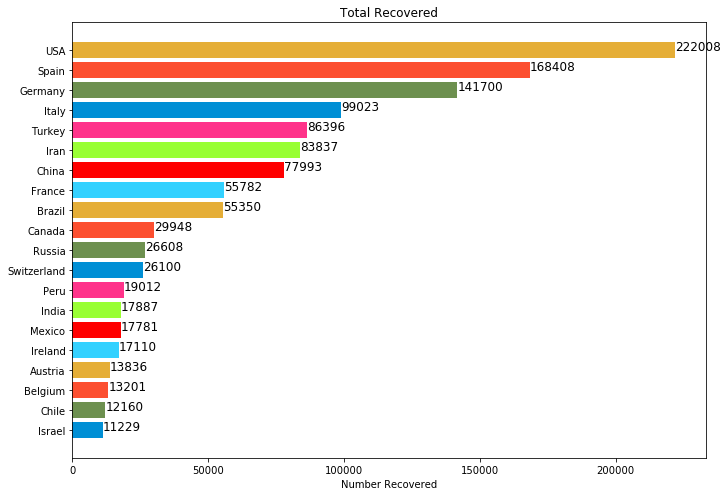

In [25]:
# set plot size
plt.rcParams['figure.figsize'] = [10, 7]

# sorting the data by total death in ascending order
con_tr = all_country.sort_values(by='TotalRecovered')


# picking the last 20 countries
con_tr = con_tr.tail(20)

x_tr = con_tr['Country']
y_tr = con_tr['TotalRecovered']

# plot type
plt.barh(x_tr,y_tr,  color=colors )

# plot label
plt.title("Total Recovered")
plt.xlabel("Number Recovered")

plt.tight_layout()

for index, value in enumerate(y_tr):
    s = '{:.0f}'.format(value)
    plt.text(value, index, str(s), fontsize=fontsize)

plt.show()
# show(tr)

# Getting insight to continent data

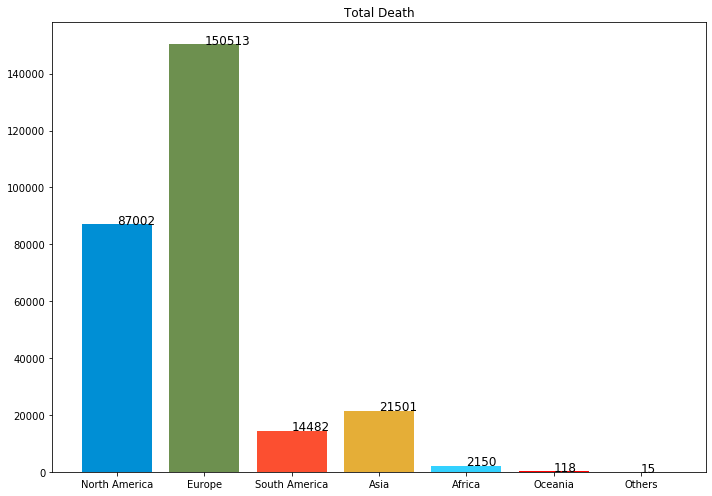

In [26]:
plt.rcParams['figure.figsize'] = [10, 7]

# Plot Axis
x_con = continent['Country']
y_con = continent['TotalDeaths']

# setting plot; y_range is used for x_tc because the data is categorical data
plt.bar(x_con, y_con, color=colors)

# plot label
plt.title("Total Death")

plt.tight_layout()

for index, value in enumerate(y_con):
    s = '{:.0f}'.format(value)
    plt.text( index, value, str(s), fontsize=fontsize)

plt.show()